In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
train_data_object_columns = train_data.dtypes[train_data.dtypes == 'object'].index
print(train_data_object_columns)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [5]:
train_data[train_data_object_columns]

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [6]:
train_data[train_data_object_columns].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Holverson, Mr. Alexander Oskar",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [7]:
train_data.Sex.unique()

array(['male', 'female'], dtype=object)

In [8]:
train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train_data['Relatives'] = train_data['SibSp'] + train_data['Parch'] > 0
pd.get_dummies(train_data[['Sex', 'Age', 'Embarked', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Relatives', 'Survived']]).corr()[['Survived']]

,Survived
Age,-0.077221
Pclass,-0.338481
SibSp,-0.035322
Parch,0.081629
Fare,0.257307
Relatives,0.203367
Survived,1.000000
Sex_female,0.543351
Sex_male,-0.543351
Embarked_C,0.168240


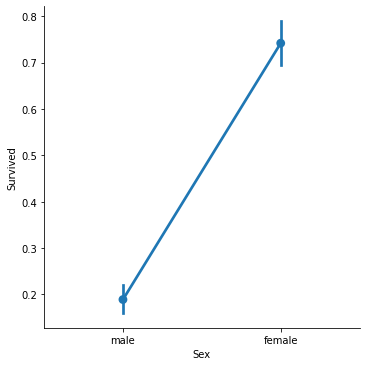

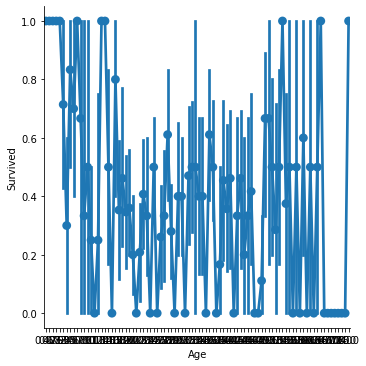

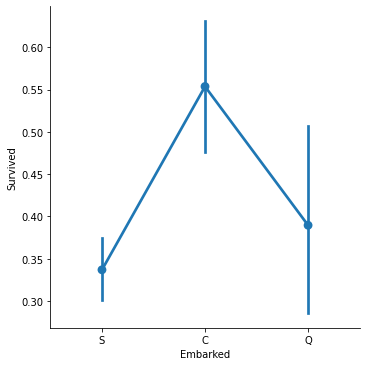

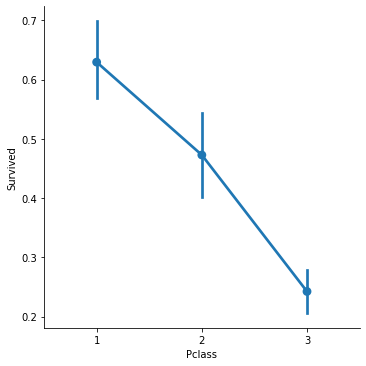

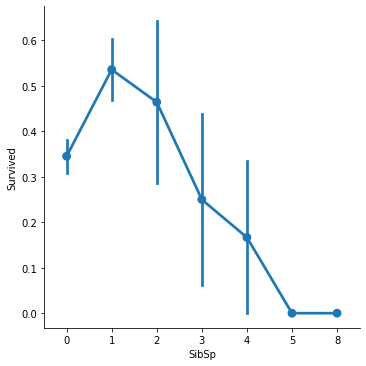

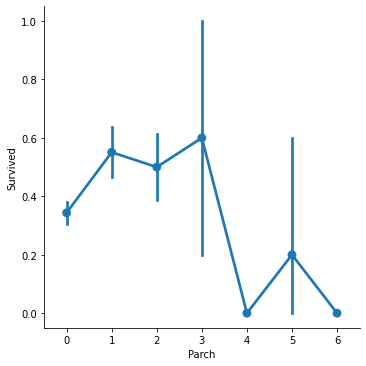

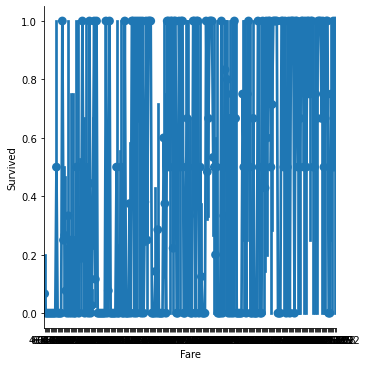

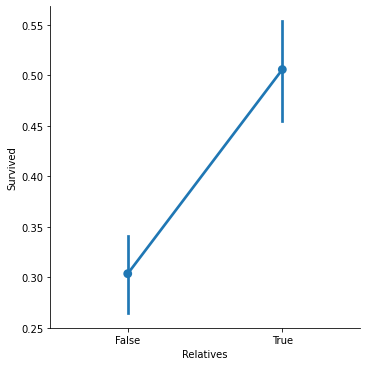

In [11]:
import seaborn as sns

for column in ['Sex', 'Age', 'Embarked', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Relatives']:
    sns.catplot(x=column,y='Survived', data=train_data, kind='point');

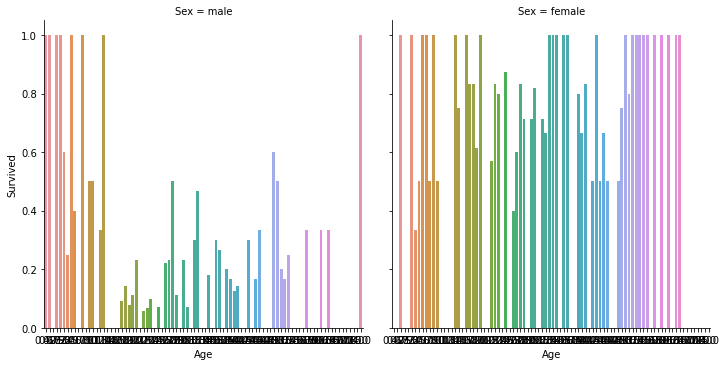

In [12]:
sns.catplot(x='Age', y='Survived', col='Sex', data=train_data, kind='bar', ci=None)

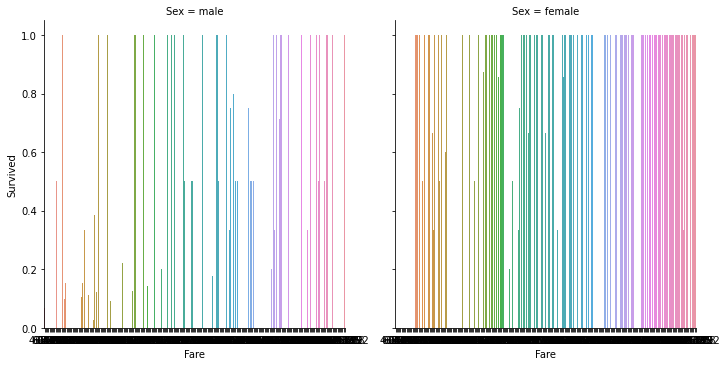

In [13]:
sns.catplot(x='Fare', y='Survived', col='Sex', data=train_data, kind='bar', ci=None)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# features = ['Age', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
num_cols = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']
cat_cols = ['Sex', 'Embarked']
features = num_cols + cat_cols
X_train = train_data[features]
y_train = train_data['Survived']
scaler = StandardScaler()
scaler.fit(train_data[num_cols])
# num_transformer = SimpleImputer(strategy='mean')
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', scaler)
])
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

RFC_model = RandomForestClassifier()
RFC_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RFC_model)
])
RFC_param_grid = {
    'model__n_estimators': [10, 20, 30, 40, 50, 70, 100, 150, 200, 250, 300, 350, 400],
    'model__max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'model__max_leaf_nodes': [None, 5, 50, 500, 3000, 4000, 5000, 7000, 10000, 15000]
}
RFC_search = GridSearchCV(RFC_pipeline, param_grid=RFC_param_grid, n_jobs=-1, verbose=1)
RFC_best_model = RFC_search.fit(X_train, y_train)
print(RFC_best_model.best_params_)
print(RFC_best_model.best_score_)

Fitting 5 folds for each of 1430 candidates, totalling 7150 fits
{'model__max_depth': 9, 'model__max_leaf_nodes': 10000, 'model__n_estimators': 250}
0.8395204318624065


In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# ABC_base = DecisionTreeClassifier(max_depth=3)
# ABC_model = AdaBoostClassifier(base_estimator=ABC_base)
ABC_model = AdaBoostClassifier()
ABC_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', ABC_model)
])
ABC_param_grid = {
    'model__n_estimators': [10, 20, 30, 40, 50, 60, 80, 100, 150, 200, 250, 300, 350, 400],
    'model__learning_rate': [.0001, .0005, .001, .005, .01, .05, .1, .5],
    'model__base_estimator': [
        DecisionTreeClassifier(max_depth=None),
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3),
        DecisionTreeClassifier(max_depth=4),
        DecisionTreeClassifier(max_depth=5)
    ]
}
ABC_search = GridSearchCV(ABC_pipeline, param_grid=ABC_param_grid, n_jobs=-1, verbose=1)
ABC_best_model = ABC_search.fit(X_train, y_train)
print(ABC_best_model.best_params_)
print(ABC_best_model.best_score_)

Fitting 5 folds for each of 672 candidates, totalling 3360 fits
{'model__base_estimator': DecisionTreeClassifier(max_depth=4), 'model__learning_rate': 0.01, 'model__n_estimators': 200}
0.8272048207896555


In [17]:
from sklearn.svm import SVC

SVC_model = SVC()
SVC_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVC_model)
])
SVC_param_grid = [
    {'model__kernel': ['linear'], 'model__C': [.1, 1, 10, 100]},
    {'model__kernel': ['poly'], 'model__C': [.1, 1, 10, 100], 'model__degree': [2, 3, 4, 5]},
    {'model__kernel': ['rbf'], 'model__C': [.1, 1, 10, 100], 'model__gamma': ['auto', 'scale']}
]
SVC_search = GridSearchCV(SVC_pipeline, param_grid=SVC_param_grid, n_jobs=-1, verbose=1)
SVC_best_model = SVC_search.fit(X_train, y_train)
print(SVC_best_model.best_params_)
print(SVC_best_model.best_score_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'model__C': 1, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
0.8282844768062269


In [18]:
from xgboost import XGBClassifier

XGBC_model = XGBClassifier(use_label_encoder=False)
XGBC_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBC_model)
])
XGBC_param_grid = {
    'model__n_estimators': [300, 500],
    'model__learning_rate': [.4, .5],
    'model__max_depth': [None, 2, 6],
    'model__reg_alpha': [0, 1],
    'model__reg_lambda': [1, 3],
    'model__gamma': [0, 1, 2],
    'model__early_stopping_rounds': [5]
}
XGBC_search = GridSearchCV(XGBC_pipeline, param_grid=XGBC_param_grid, n_jobs=-1, verbose=1)
XGBC_best_model = XGBC_search.fit(X_train, y_train)
print(XGBC_best_model.best_params_)
print(XGBC_best_model.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[22:41:16] WARNING: ../src/learner.cc:573: 
Parameters: { "early_stopping_rounds" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:41:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'model__early_stopping_rounds': 5, 'model__gamma': 1, 'model__learning_rate': 0.4, 'model__max_depth': None, 'model__n_estimators': 300, 'model__reg_alpha': 0, 'model__reg_lambda': 3}
0.8350386039796623


In [19]:
best_model = max([RFC_best_model, XGBC_best_model, SVC_best_model, ABC_best_model], key=lambda x: x.best_score_)
print(best_model.best_params_)
print(best_model.best_score_)
print(best_model.best_estimator_)

{'model__max_depth': 9, 'model__max_leaf_nodes': 10000, 'model__n_estimators': 250}
0.8395204318624065
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Pclass', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
    

In [20]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
preds = best_model.best_estimator_.predict(test_data[features])
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': preds})
output.to_csv('submission.csv', index=False)